# Santander Customer Transaction Prediction Using Decision Tree

## Objective :
### To identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset 

In [2]:
#loading train dataset 

train= pd.read_csv(r'C:\Users\user\Downloads\santander-customer-transaction-prediction\train.csv')
train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [3]:
#checking for null or missing values

train.isnull().any().any()

False

In [4]:
#to know data type of the columns 

train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [5]:
train.describe()          #basic statistics about train dataset

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
#loading test dataset

test= pd.read_csv(r'C:\Users\user\Downloads\santander-customer-transaction-prediction\test.csv')
test

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [7]:
#dropping unwanted column

test.drop('ID_code',axis=1,inplace=True)

In [8]:
test.describe()                    #basic statistics about test dataset

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


### Exploratory Data Analysis

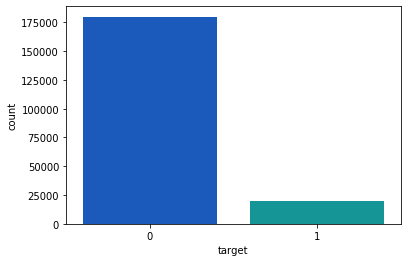

In [9]:
#to check the distribution of target value in train dataset.

sns.countplot(train['target'], palette='winter')

There are about 10% target values with 1

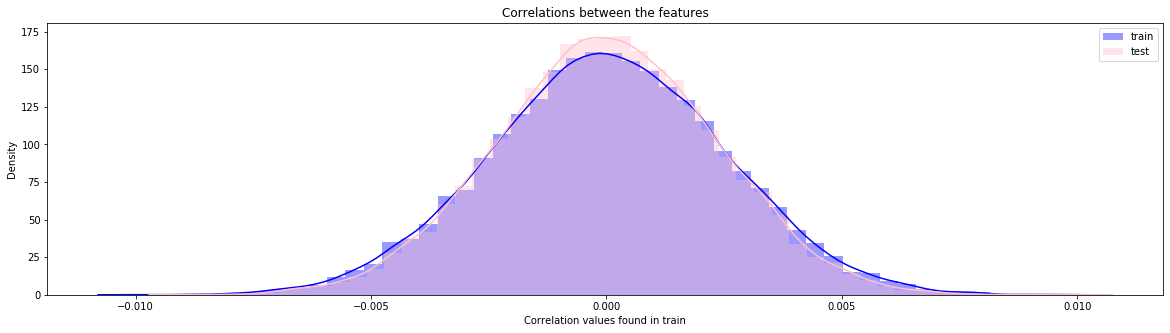

In [10]:
#checking correlation between train and test data

train_correlations = train.drop(["target"], axis=1).corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

test_correlations = test.corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Pink", label="test")
plt.xlabel("Correlation values found in train")
plt.ylabel("Density")
plt.title("Correlations between the features"); 
plt.legend();

Correlation between the features of train and test dataset is very small, can be said as they are decorrelated.

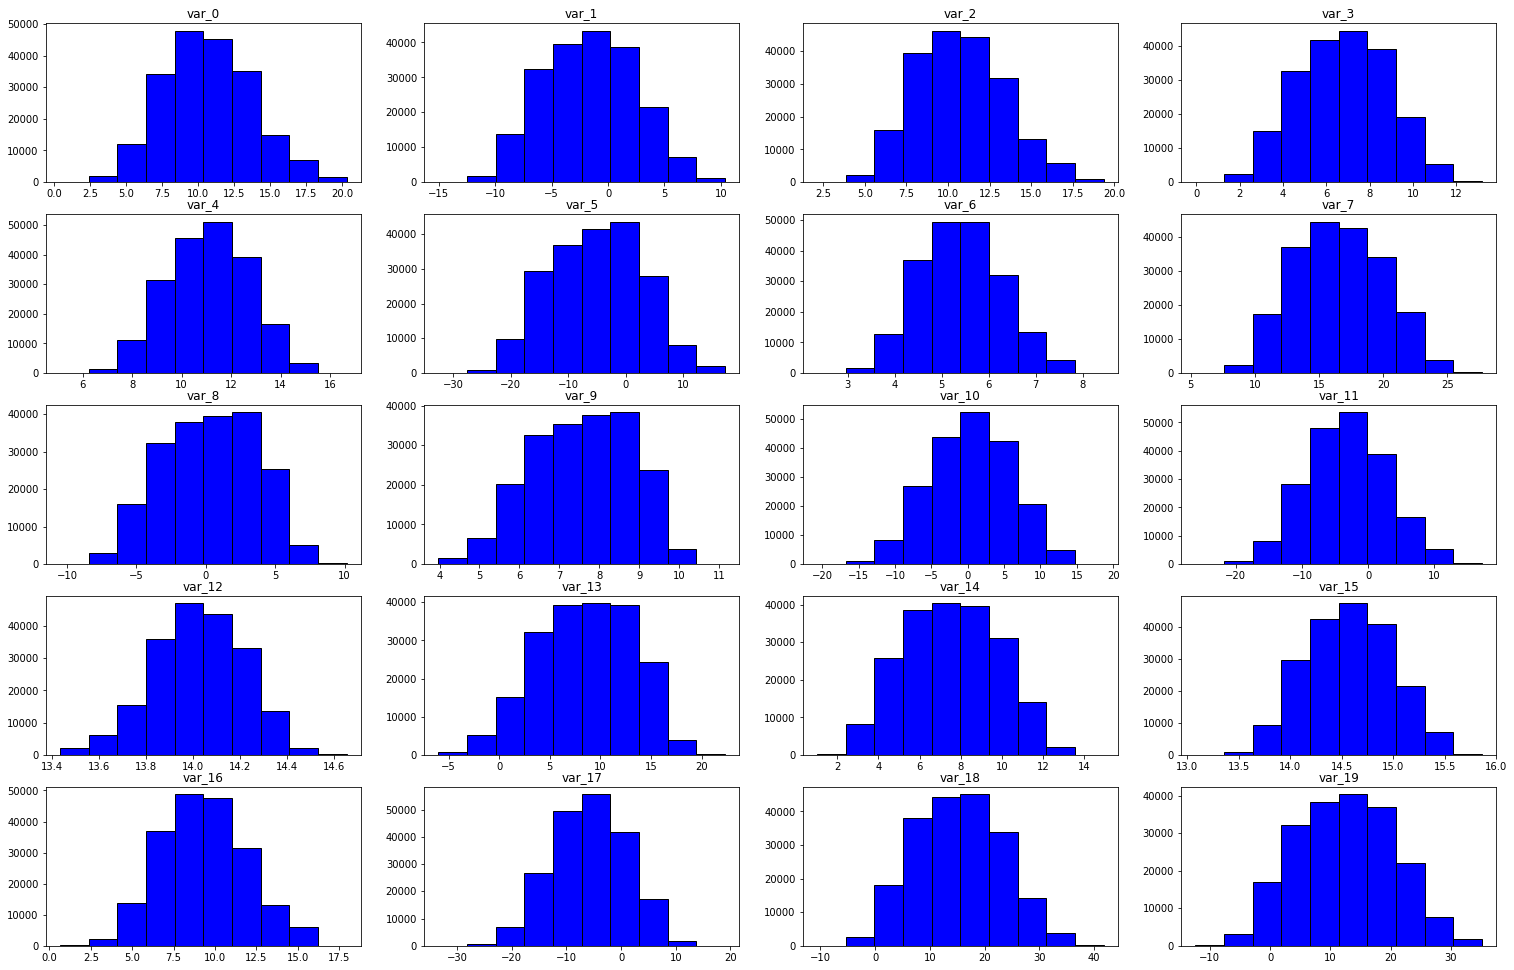

In [11]:
#Distributions of first 20 columns i.e from var0 to var19

plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train.columns)[2:22]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train[col],color='b', edgecolor='black')
    plt.title(col)

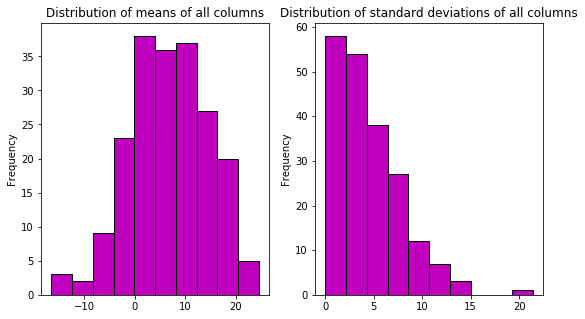

In [12]:
#Distribution of means and standard deviations of the columns

plt.figure(figsize=(9, 5))

plt.subplot(1,2,1)
train[train.columns[2:]].mean().plot(kind='hist',color='m',edgecolor='black');
plt.title('Distribution of means of all columns');

plt.subplot(1,2,2)
train[train.columns[2:]].std().plot(kind='hist',color='m',edgecolor='black');
plt.title('Distribution of standard deviations of all columns');

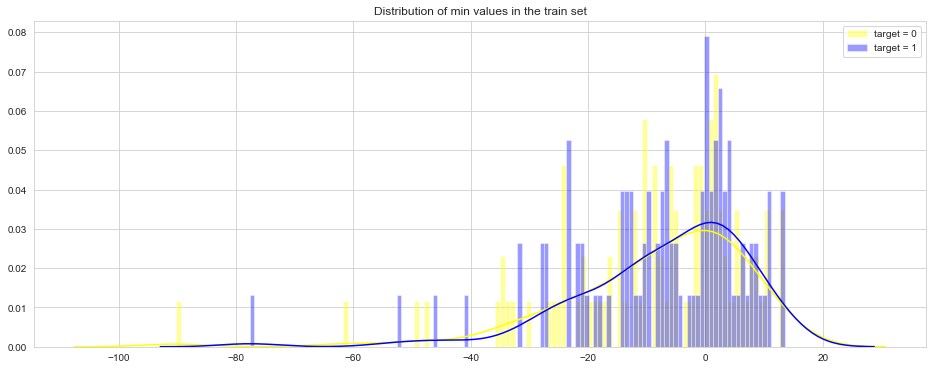

In [26]:
#Distribution of minimum values in the train set

features = train.columns.values[2:102]
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of min values in the train set")
sns.distplot(t0[features].min(),color="yellow", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()
  

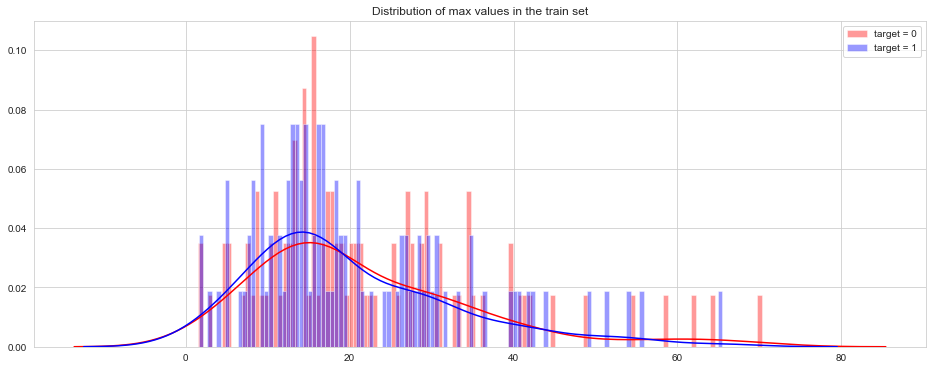

In [27]:
#Distribution of maximum values in the train set

plt.figure(figsize=(16,6))
plt.title("Distribution of max values in the train set")
sns.distplot(t0[features].max(),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

### Model Development 

#### Step 1:  Splitting dependent and independent variables

In [28]:
x=train.iloc[:,2:].values       
x

array([[  8.9255,  -6.7863,  11.9081, ...,   8.5635,  12.7803,  -1.0914],
       [ 11.5006,  -4.1473,  13.8588, ...,   8.7889,  18.356 ,   1.9518],
       [  8.6093,  -2.7457,  12.0805, ...,   8.2675,  14.7222,   0.3965],
       ...,
       [ 11.2232,  -5.0518,  10.5127, ...,   8.7155,  13.8329,   4.1995],
       [  9.7148,  -8.6098,  13.6104, ...,  10.0342,  15.5289, -13.9001],
       [ 10.8762,  -5.7105,  12.1183, ...,   8.1857,  12.1284,   0.1385]])

In [29]:
y=train.iloc[0:,1].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Step 2: Instantiation of Decision Tree classifier object

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

In [31]:
#Instantiate a Decision Tree classifier

df = DecisionTreeClassifier()

#### Step 3: RandomizedSearchCV parameters  and distributions

In [32]:
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_leaf = [1,2,5,10]

In [33]:
#Setup the parameters and distributions
##create the random grid

random_grid = {"max_depth": max_depth,
              "max_features": randint(1, 9),
              "min_samples_leaf": min_samples_leaf,
              "criterion": ["gini", "entropy"]}

In [34]:
random_grid

{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': <scipy.stats._distn_infrastructure.rv_frozen at 0x25805e3b648>,
 'min_samples_leaf': [1, 2, 5, 10],
 'criterion': ['gini', 'entropy']}

In [37]:
#Instantiate the RandomizedSearchCV object

decision_random= RandomizedSearchCV(estimator=df,param_distributions=random_grid, n_iter = 10, cv = 5,random_state=0)

In [40]:
decision_random.best_params_    #gives best parameters found

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 1,
 'min_samples_leaf': 1}

#### Step 4: Fiting the data 

In [39]:
decision_random.fit(x,y)      #Fiting the best params found to the data

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [41]:
y_pred = decision_random.predict(test)    #predicting the targets for test dataset

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Step 5: Measuring Accuracy 

In [43]:
#measuring accuracy score of the prediction

from sklearn.metrics import accuracy_score      
accuracy_score(y,y_pred)

0.89948

### Ploting Decision tree using GraphViz 

In [44]:
df = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=5,max_features=1,min_samples_leaf=1)
df.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


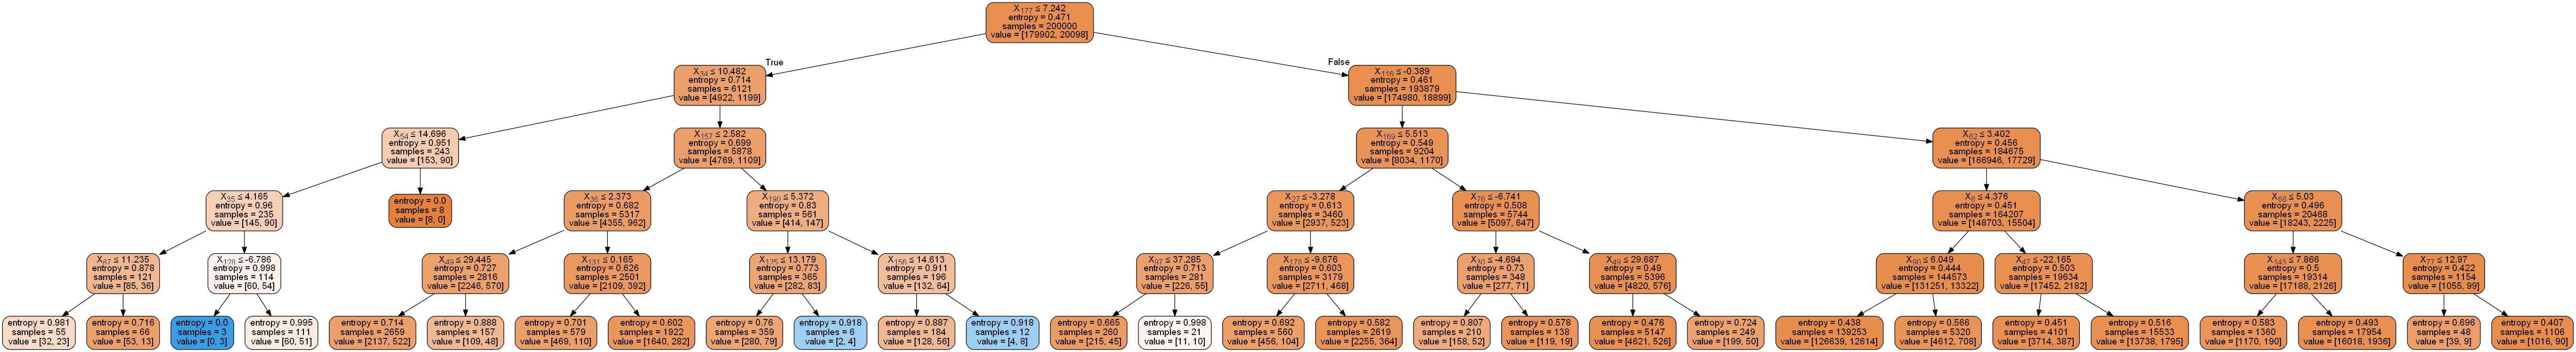

In [45]:
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(df, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())